# 8. 경사하강법 Gradient Descent

: 예측값과 정답값 간의 차이인 손실 함수의 크기를 최소화시키는 파라미터를 찾는 것
- 컨벡스 함수를 다루는데 가장 효과적인 최적화 방법
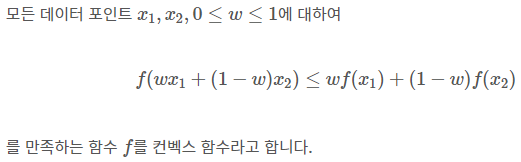
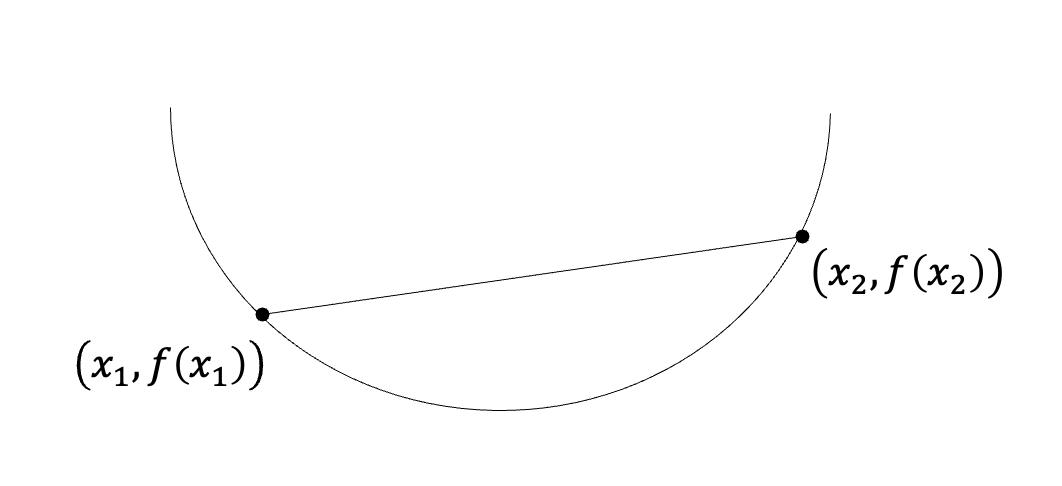
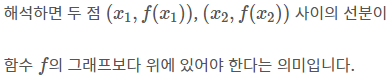
- 학습 데이터 입력을 변경할 수 없기 때문에 손실 함수 값의 변화에 따라 가중치(weight) 혹은 편향(bias)을 업데이트해야 함
- 최적의 가중치나 편향을 찾는 방법
- 시작점: 성능을 평가하기 위한 임의의 지점
- 시작점에서 도함수(기울기)를 구하고 이로부터 접선을 사용하여 기울기의 가파른 정도를 확인
- 기울기: 매개변수에 대한 업데이트, 즉 가중치 및 편향을 결정
- 시작점에서의 기울기는 가파르지만, 새 매개변수가 생성되면 수렴점으로 알려진 곡선의 가장 낮은 지점에 이를 때까지 가파른 정도가 점진적으로 감소
- 경사하강법의 목표: 비용 함수 또는 예측된 y와 실제 y 사이의 오차를 최소화하는 것
    - 이를 위해선 방향(direction), 학습률(learning rate) 필요
        - > 향후 반복에 대한 편도 함수 계산을 결정하여 점진적으로 국소 최소값(local minimum) 또는 전역 최소값(global minimum)에 도달하도록 함
        - 학습률: 최소값에 도달하는 데 필요한 보폭
            - 학습률이 높으면 보폭이 커지지만 최소값을 지나칠 위험이 있음
            - 학습률이 낮으면 보폭이 작아 정확성이 높아진다는 장점이 있지만, 최소값에 도달하는 데 더 많은 시간과 계산이 요구되므로 반복 횟수가 전반적인 효율성을 떨어뜨림
        - 비용(또는 손실) 함수: 현재 위치에서 실제 y와 예측된 y 사이의 차이 또는 오차를 측정함.
            - 모델이 매개변수를 조정하여 오차를 최소화하고 국소 최소값 또는 전역 최소값을 찾을 수 있도록 모델에 피드백을 제공하여 머신 러닝 모델의 효과를 개선
            - 모델은 가장 가파른 하강의 방향(또는 음의 경사(negative gradient))을 따라 비용 함수가 0에 가까워지거나 0이 될 때까지 계속해서 반복함
            - 비용 함수: 훈련 세트 전체의 평균 오차를 계산
            - 손실 함수: 하나의 훈련 사례의 오차를 가르킴


### 경사하강법의 유형

#### 1. 배치 경사하강법(batch gradient descent)
- 몽땅 꺼내기
- 훈련 세트의 각 포인트의 오차를 합산하여 모든 훈련 사례가 평가된 후에만 모델을 업데이트 -> 이 과정이 훈련 에포크(training epoch)
- 장점
    - 일괄 처리로 계산 효율성 제공, 오차 경사와 수렴이 안정적
- 단점
    - 대규모 훈련 데이터의 경우 모든 데이터를 메모리에 저장해야 하므로 처리 시간이 길어질 수 있음
    - 때로는 전역 최소값이 아니라 극소 최소값을 찾으므로 가장 이상적인 수렴점이 아닐 때도 있음
    
#### 2. 확률적 경사하강법(stochastic gradient descent)
- 한 개씩 꺼내기
- 데이터 세트 내의 각 사례에 대해 훈련 에포크를 실행하고 한 번에 하나씩 각 훈련 사례의 매개변수를 업데이트
- 장점
    - 하나의 훈련 사례만 보관하면 되므로 메모리에 저장하기가 더 쉬움
    - 빈번한 업데이트로 모델을 세부적으로 개선하고 속도를 높임
- 단점
    - 배치 경사하강법에 비해 계산 효율성이 떨어질 수 있음
    - 빈번한 업데이트로 인해 노이즈가 많은 경사를 얻게 될 수 있음
        - 하지만 국소 최소값을 벗어나 전역 최소값을 찾는 데에는 도움이 될 수 있음

#### 3. 미니배치 경사하강법(mini-batch gradient)
- 여러 개씩 꺼내기
- 배치 경사하강법과 확률적 경사하강법의 개념을 결합한 것
- 휸련 데이터 세트를 작은 배치 크기로 나누어 각 배치에 대한 업데이트 수행
- 배치 경사하강법의 계산 효율성과 확률적 경사하강법의 속도 사이에서 균형을 유지

### 경사하강법의 문제점
- 최적화 문제를 위한 가장 흔한 접근법이지만 문제를 수반함

#### 국소 최소값 및 안장점
- 컨벡스 함수의 경우 쉽게 전역 최소값을 구할 수 있음
- 비컨벡스 함수의 경우 경사하강법은 모델이 최상의 결과를 달성하는 지점인 전역 최값을 구하는 데 어려움을 겪을 수 있음
    - 비컨벡스 함수는 하나 이상의 국소 최소값 또는 안장점을 가지며, 이러한 지점들로 인해 전역 최소값을 찾는 데 어려움을 겪을 수 있음
        - 국소 최소값: 함수에서의 한 지점으로 해당 지점 주변에서는 다른 모든 점들보다 작은 값을 가짐.
            - 기울기의 방향을 따라 이동하며 최소값을 찾음. 국소 최소값에 도달하면 더이상 내려가지 않고 멈출 수 있음. 이로 인해 전역 최소값보다 덜 좋은 해에 머무를 수 있음
        - 안장점: 기울기가 모두 0이지만 국소 최소값이 아닌 지점으로 한 방향에서는 국소 최소값으로 내려가고, 다른 방향에서는 국소 최대값으로 올라가는 지점
            - 경사하강법은 기울기가 0인 지점에서 멈출 수 있으며, 안장점에 도달하면 최적화 과정이 종료되지만 이러한 점은 전역 최소값이 아닐 수 있기 때문

- 특히 비컨벡스 문제에서는 초기값에 따라 최적해가 달라질 수 있으며, 노이즈가 많은 경사는 최적화 과정을 더 어렵게 만들 수 있음
    - 이런 문제를 해결하기 위해서는 초기값을 조정하거나 다른 최적화 알고리즘을 사용하는 등의 접근 방법이 필요함

#### 모멘텀 Momentum
: 경사하강법에 관성을 추가하여 최적화의 안정성을 향상시키는 방법
- 기울기 업데이트에 이전 스텝의 방향을 반영하여 이동하므로 국소 최소값과 안장점을 빠르게 나올 수 있음

이 외에도 많은 것들이 있지만 위에 언급한 국소 최소값과 안장점을 해결하기에 좋은 알고리즘이라고 추천되었음

#### 기울기 소실 및 기울기 폭발
- 심층 신경망(Deep Neural Networks)에서 경사하강법을 사용할 때 발생하는 문제

##### 기울기 소실 Gradient Vanishing
- 심층 신경망의 역전파(Backpropagation) 과정에서 발생하는 문제
- 신경망의 깊이가 길어질수록 발생할 확률이 높아짐
- 역전파 과정에서 신경망의 하위 층으로 기울기가 전달될 때, 연속적으로 층을 거치며 역전파되는 기울기가 점차 작아지다가 거의 0에 수렴하는 경우
- 이러한 경우 하위층들의 가중치가 거의 업데이트되지 않아 학습이 제대로 이루어지지 않음

<br>

- 기울기 소실은 주로 활성화 함수로 시그모이드나 하이퍼볼릭 탄젠트를 사용할 때 발생할 가능성이 높음
- 활성화 함수는 입력값이 크거나 작을 때 기울기가 0에 가까워지는 특성을 가지기 때문에, 신경망의 깊이가 증가하면서 기울기 소실 문제가 발생

##### 기울기 폭발 Gradient Explosion
- 역전파 과정에서 기울기가 지나치게 커지는 문제
- 가중치 업데이트가 매우 크게 이루어져 모델의 파라미터가 발산하여 NaN 또는 무한대 값으로 발산하는 상황이 발생

- 주로 활성화 함수로 ReLU(Rectified Linear Unit)을 사용할 때 발생할 가능성이 높음
- ReLU 함수는 입력값이 0보다 크면 기울기가 1이 되는 특성을 가지는데, 이로 인해 역전파 과정에서 기울기가 급격히 커질 수 있음


> 기울기 소실과 기울기 폭발은 심층 신경망에서 학습의 어려움을 초래할 수 있음
> 해결하기 위한 방법
> - 가중치 초기화 방법을 조정
> - 활성화 함수를 다른 것을 바꾸기
> - 배치 정규화(Batch Normalization)과 같은 기법을 사용하여 안정성 향상

epoch = 0, 기울기 = 23.2000, 절편 = 4.5250, 에러 = 90.5000
epoch = 100, 기울기 = 7.9316, 절편 = 45.3932, 에러 = 5.4935
epoch = 200, 기울기 = 4.7953, 절편 = 64.1094, 에러 = 2.4341
epoch = 300, 기울기 = 3.4056, 절편 = 72.4022, 에러 = 1.0785
epoch = 400, 기울기 = 2.7899, 절편 = 76.0766, 에러 = 0.4779
epoch = 500, 기울기 = 2.5171, 절편 = 77.7047, 에러 = 0.2117
epoch = 600, 기울기 = 2.3962, 절편 = 78.4261, 에러 = 0.0938
epoch = 700, 기울기 = 2.3426, 절편 = 78.7457, 에러 = 0.0416
epoch = 800, 기울기 = 2.3189, 절편 = 78.8873, 에러 = 0.0184
epoch = 900, 기울기 = 2.3084, 절편 = 78.9501, 에러 = 0.0082
epoch = 1000, 기울기 = 2.3037, 절편 = 78.9779, 에러 = 0.0036
epoch = 1100, 기울기 = 2.3016, 절편 = 78.9902, 에러 = 0.0016
epoch = 1200, 기울기 = 2.3007, 절편 = 78.9957, 에러 = 0.0007
epoch = 1300, 기울기 = 2.3003, 절편 = 78.9981, 에러 = 0.0003
epoch = 1400, 기울기 = 2.3001, 절편 = 78.9991, 에러 = 0.0001
epoch = 1500, 기울기 = 2.3001, 절편 = 78.9996, 에러 = 0.0001
epoch = 1600, 기울기 = 2.3000, 절편 = 78.9998, 에러 = 0.0000
epoch = 1700, 기울기 = 2.3000, 절편 = 78.9999, 에러 = 0.0000
epoch = 1800, 기울기 = 2.3000, 절편 = 79.000

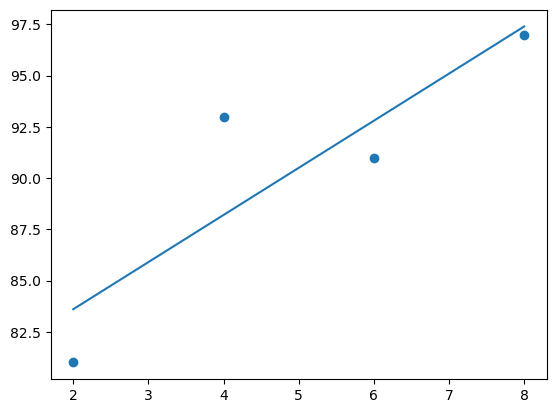

In [3]:
import matplotlib.pyplot as plt
import numpy as np

data = [[2, 81], [4, 93], [6, 91], [8, 97]]  #데이터셋 설정
x = [i[0] for i in data]  #[2, 4, 6, 8]
y = [i[1] for i in data]  #[81, 93, 91, 97]

x_data = np.array(x)     #넘파이 배열로 변환
y_data = np.array(y)

a = 0
b = 0

lr = 0.05

epochs = 2000

for i in range (epochs):
    y_pred = a*x_data+b
    error = y_data - y_pred
    
    a_diff = -(1/len(x_data))*sum(x_data*(error))
    b_diff = -(1/len(x_data))*sum(y_data - y_pred)
    
    a = a-lr*a_diff
    b = b-lr*b_diff
    
    if i%100 == 0:
        print("epoch = %.f, 기울기 = %.04f, 절편 = %.04f, 에러 = %.04f"%(i, a, b, error.mean()))

plt.scatter(x, y)
plt.plot([min(x_data), max(x_data)], [min(y_pred), max(y_pred)])
plt.show()